## Goal:
# Explore the Planets dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
## 1. Why This Project?
1. Learn data cleaning with Pandas — handle missing numerical and categorical data.

2. Use NumPy for calculations — compute mean, median, and counts.

3. Visualize trends using Matplotlib and Seaborn — scatterplots, histograms, and heatmaps.

4. Understand relationships between planetary features — mass, period, and method of discovery.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 3. Load Dataset

In [2]:
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (1035, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.

### Insights:

1. ~1035 exoplanets, 5 features (method, number, orbital_period, mass, year).

2. Missing values exist in orbital_period and mass.

3. Useful for studying trends in exoplanet discoveries over time.

## 5. Data Cleaning

In [4]:
df['orbital_period'] = df['orbital_period'].fillna(df['orbital_period'].median())
df['mass'] = df['mass'].fillna(df['mass'].median())

### Insights:

1. Filling missing values ensures calculations and plots work without errors.

2. Median is used because mass and period can have extreme outliers.

## 6. Analysis with NumPy & Pandas

# Average orbital period and mass

In [5]:
avg_period = np.mean(df['orbital_period'])
avg_mass = np.mean(df['mass'])
print("Average Orbital Period:", avg_period)
print("Average Mass:", avg_mass)

Average Orbital Period: 1921.3655785758456
Average Mass: 1.9430882898550725


# Discoveries by method

In [6]:
discoveries_by_method = df['method'].value_counts()
print("Number of Discoveries by Method:\n", discoveries_by_method)

Number of Discoveries by Method:
 method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64


# Average mass by discovery method

In [7]:
avg_mass_method = df.groupby('method')['mass'].mean()
print("Average Mass by Discovery Method:\n", avg_mass_method)

Average Mass by Discovery Method:
 method
Astrometry                       1.260000
Eclipse Timing Variations        2.118889
Imaging                          1.260000
Microlensing                     1.260000
Orbital Brightness Modulation    1.260000
Pulsar Timing                    1.260000
Pulsation Timing Variations      1.260000
Radial Velocity                  2.524116
Transit                          1.260529
Transit Timing Variations        1.260000
Name: mass, dtype: float64


# Number of discoveries per year

In [8]:
discoveries_per_year = df.groupby('year')['number'].sum()
print("Discoveries per Year:\n", discoveries_per_year)

Discoveries per Year:
 year
1989      1
1992      6
1994      3
1995      1
1996     15
1997      1
1998     11
1999     24
2000     27
2001     15
2002     46
2003     35
2004     41
2005     64
2006     43
2007     65
2008    120
2009    131
2010    193
2011    354
2012    258
2013    277
2014    117
Name: number, dtype: int64


### Insights:

1. Radial Velocity and Transit are the most common discovery methods.

2. Mass and orbital period vary widely across methods.

3. Exoplanet discoveries increased over recent years.

## 7. Visualization with Matplotlib

# Bar chart of discoveries by method

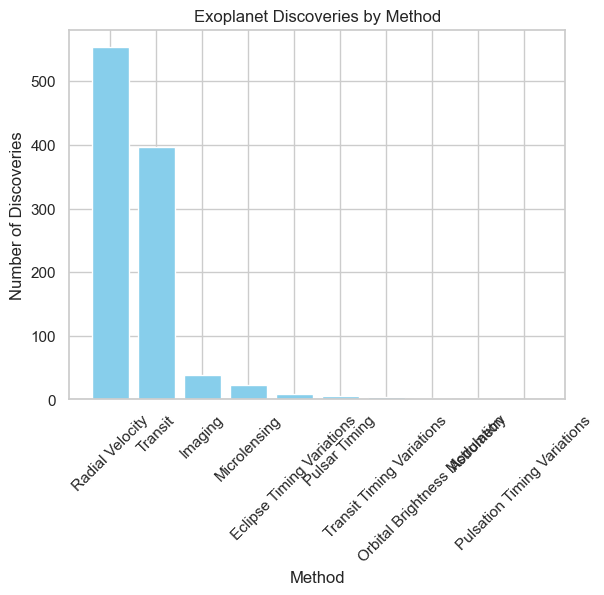

In [9]:
methods = discoveries_by_method.index
counts = discoveries_by_method.values

plt.bar(methods, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Exoplanet Discoveries by Method")
plt.xlabel("Method")
plt.ylabel("Number of Discoveries")
plt.show()

# Line plot: discoveries per year

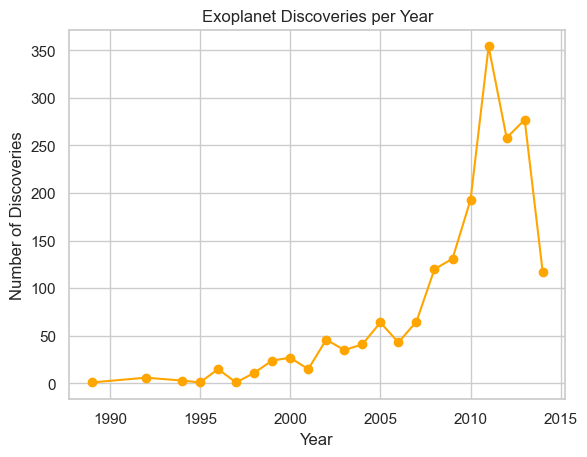

In [10]:
years = discoveries_per_year.index
year_counts = discoveries_per_year.values

plt.plot(years, year_counts, marker='o', color='orange')
plt.title("Exoplanet Discoveries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Discoveries")
plt.show()


### Insights:

1. Radial Velocity and Transit dominate discoveries.

2. Number of discoveries surged after 2009.


## 8. Visualization with Seaborn

# Histogram of orbital periods

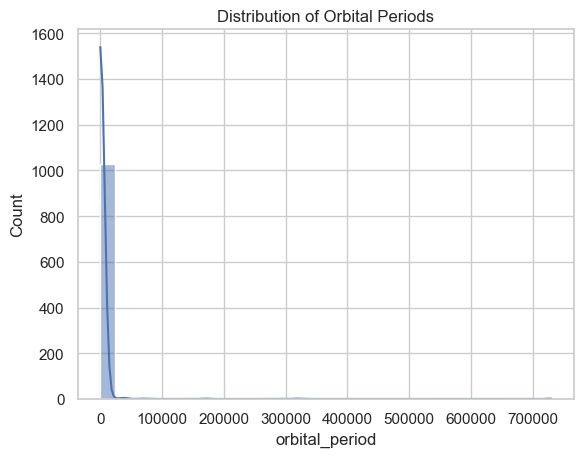

In [11]:
sns.histplot(df['orbital_period'], bins=30, kde=True)
plt.title("Distribution of Orbital Periods")
plt.show()

# Boxplot of mass by discovery method

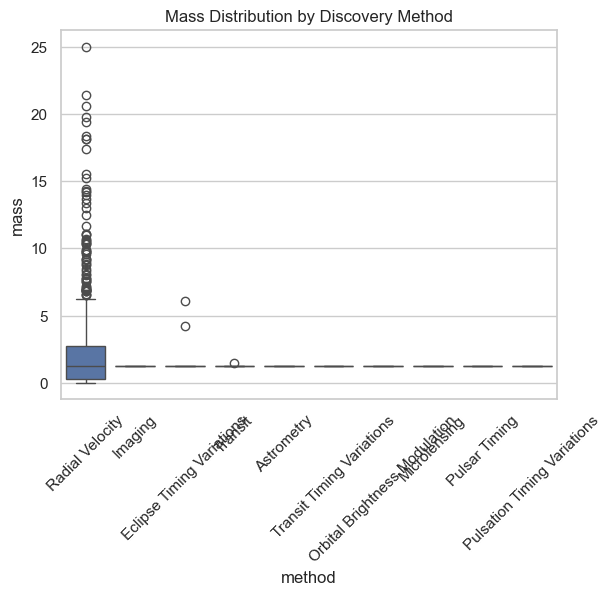

In [12]:
sns.boxplot(x='method', y='mass', data=df)
plt.xticks(rotation=45)
plt.title("Mass Distribution by Discovery Method")
plt.show()

# Scatterplot: orbital period vs mass, hue by method

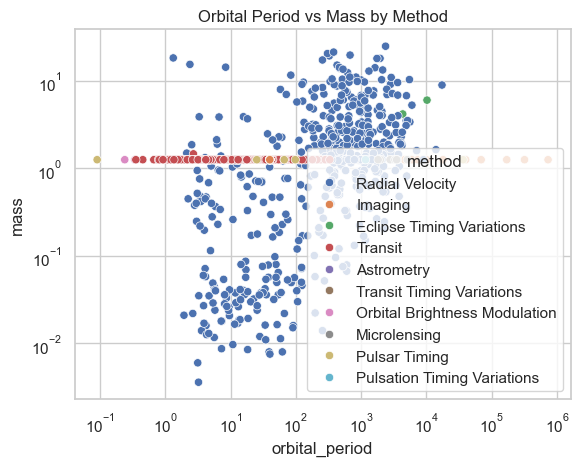

In [13]:
sns.scatterplot(x='orbital_period', y='mass', hue='method', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title("Orbital Period vs Mass by Method")
plt.show()

# Pairplot of numerical features

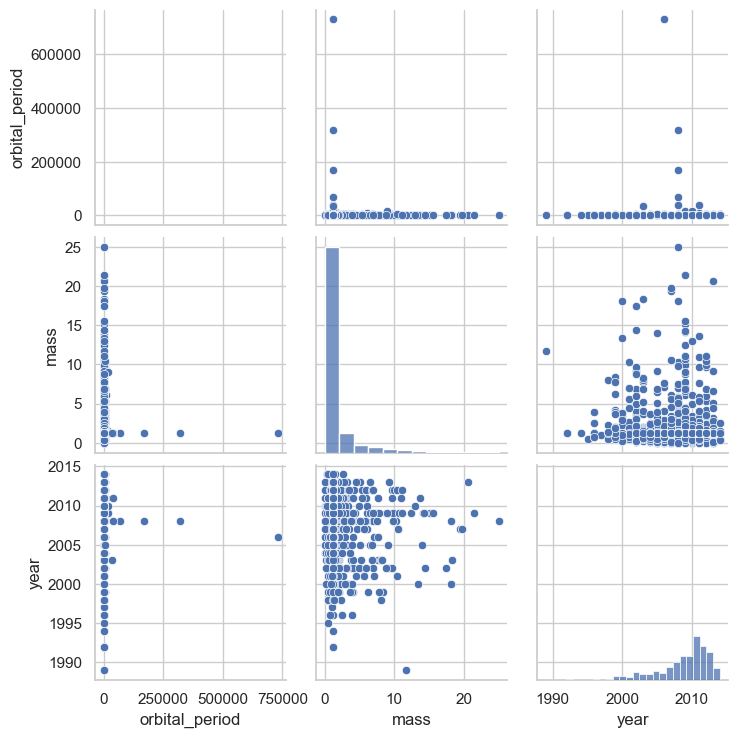

In [14]:
sns.pairplot(df[['orbital_period','mass','year']], kind='scatter')
plt.show()

# Heatmap of correlation

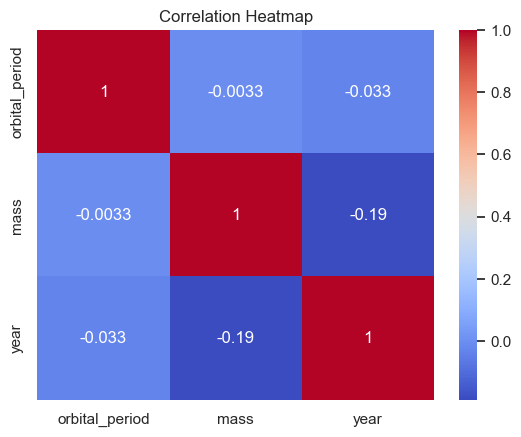

In [15]:
corr = df[['orbital_period','mass','year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



### Insights:

1. Histogram: most planets have short orbital periods.

2. Boxplot: mass varies greatly by discovery method; Transit finds smaller planets.

3. Scatterplot (log-log): highlights extreme outliers in mass and period.

4. Pairplot: visual relationships between orbital period, mass, and year.

5. Heatmap: low correlation between features, except slight positive correlation with year and number of planets discovered.